<a href="https://colab.research.google.com/github/PedroHCasarotto/Intelig-ncia-Artificial/blob/main/IA_Trabalho_AM_Supervisionado_Classifica%C3%A7%C3%A3o_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho de Implementação - AM Supervisionado**

Pedro Henrique Casarotto - 790935

Rafael de Camillo Masson - 790774

## Sobre o trabalho

Nosso trabalho consiste em classificar a nota recebida de um filme em relação à sua nota no IMDb (Internet Movie Database). As classificações disponíveis são:

Classe A - filme com nota igual ou superior a 9.0

Classe B - filme com nota entre 8.5 e 8.9

Classe C - filme com nota entre 8.0 e 8.4

Classe D - filme com nota inferior a 8.0

## Referências


Dataset utilizado disponível em: [https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)

#Importando o Dataset

In [ ]:
import pandas as pd

data = pd.read_csv('imdb_top_1000.csv')

### Dataset:

In [ ]:
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


# Tratamento de dados

## Eliminando dados desinteressantes

In [ ]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Poster_Link', 'Certificate', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4' ,'Overview'])

## Trasformando dados em inteiros, floats ou binários 

###Verificando o tipo dos dados

In [ ]:
data.dtypes

Series_Title      object
Released_Year     object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
No_of_Votes        int64
Gross             object
dtype: object

### Transformando dados de bilheteria em inteiro

In [ ]:
data['Gross'] = data['Gross'].str.replace(',', '')
data['Gross'] = pd.to_numeric(data['Gross'])

### Transformando dados de tempo de filme em inteiro

In [ ]:
data['Runtime'] = data['Runtime'].str.split(pat=' min', expand=True)[0]
data['Runtime'] = pd.to_numeric(data['Runtime'])

### Transformando dados referentes ao gênero dos filmes em binário

#### Criando uma lista com os gêneros existentes

In [ ]:
genre = data['Genre'].str.split(pat=', ', expand=True)

genre_list = []

for i in range(len(genre.columns)):
  for j in genre[i]:
    if j not in genre_list:
      genre_list.append(j)

genre_list.remove(None)


#### Lista de gêneros existentes:

In [ ]:
genre_list

['Drama',
 'Crime',
 'Action',
 'Biography',
 'Western',
 'Comedy',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery',
 'Film-Noir',
 'Fantasy',
 'Family',
 'Thriller',
 'Romance',
 'Sci-Fi',
 'War',
 'Music',
 'Musical',
 'Sport',
 'History']

#### Atribuindo 0 ou 1 para cada gênero, dependendo do filme

In [ ]:
for i in genre_list:
  data.insert(len(data.columns), i, 0)
  
for i in range(len(genre.columns)):
  for index, item in enumerate(genre.iloc[:,i]):
    if item in genre_list:
      data.iloc[:,8 + genre_list.index(item)][index] = 1

<ipython-input-10-bb2f91375269>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,8 + genre_list.index(item)][index] = 1


#### Eliminando a antiga coluna de gêneros

In [ ]:
data = data.drop(columns='Genre')

### Transformando dados referentes ao ano de lançamento dos filmes em inteiro

In [ ]:
data['Released_Year'].max()       # único valor não numérico da coluna 'Released_Year'

'PG'

In [ ]:
item = data[data['Released_Year'] == data['Released_Year'].max()]

data = data.drop(item.index[0])

data['Released_Year'] = pd.to_numeric(data['Released_Year'])

#### Removendo linhas com valores faltantes

In [ ]:
data = data.dropna()

### Dataset após as transformações:

In [ ]:
data

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Drama,Crime,Action,...,Fantasy,Family,Thriller,Romance,Sci-Fi,War,Music,Musical,Sport,History
0,The Shawshank Redemption,1994,142,9.3,80.0,2343110,28341469.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,175,9.2,100.0,1620367,134966411.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008,152,9.0,84.0,2303232,534858444.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,1974,202,9.0,90.0,1129952,57300000.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,1957,96,9.0,96.0,689845,4360000.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157,7.6,77.0,30144,696690.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
991,Kelly's Heroes,1970,144,7.6,50.0,45338,1378435.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
992,The Jungle Book,1967,78,7.6,65.0,166409,141843612.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
994,A Hard Day's Night,1964,87,7.6,96.0,40351,13780024.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# Vamos prever a nota média do IMDb

## Criando colunas de labels

In [ ]:
tipos = ['Tipo A', 'Tipo B', 'Tipo C', 'Tipo D']

for i in tipos:
  data.insert(len(data.columns), i, 0)

# Aplicando Árvore de Decisão 

## Atribuindo um tipo a cada filme, dependendo de sua nota no IMDB

In [ ]:
data.insert(len(data.columns), 'Tipo', 0)

for index in data.index:
  if data['IMDB_Rating'][index] >= 9.0:
    data['Tipo'][index] = 1
  elif data['IMDB_Rating'][index] >= 8.5:
    data['Tipo'][index] = 2
  elif data['IMDB_Rating'][index] >= 8.0:
    data['Tipo'][index] = 3
  else:
    data['Tipo'][index] = 4

<ipython-input-17-d2d15af2b17b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tipo'][index] = 1
<ipython-input-17-d2d15af2b17b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tipo'][index] = 2
<ipython-input-17-d2d15af2b17b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tipo'][index] = 3
<ipython-input-17-d2d15af2b17b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

## Dividindo o conjunto de dados em um conjunto de treinamento e um conjunto de teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_data = data.drop(columns=['Series_Title', 'IMDB_Rating'])     # retirando titulo do filme (valor de string) e a coluna de notas do IMDb
X_data = X_data.drop(columns=['Tipo'])

y_data = data['Tipo']


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

## Aplicando o algoritmo de indução de árvore de decisão no conjunto de treinamento

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')

dtree = dtree.fit(X_train, y_train)

## Gerando a figura da árvore de decisão

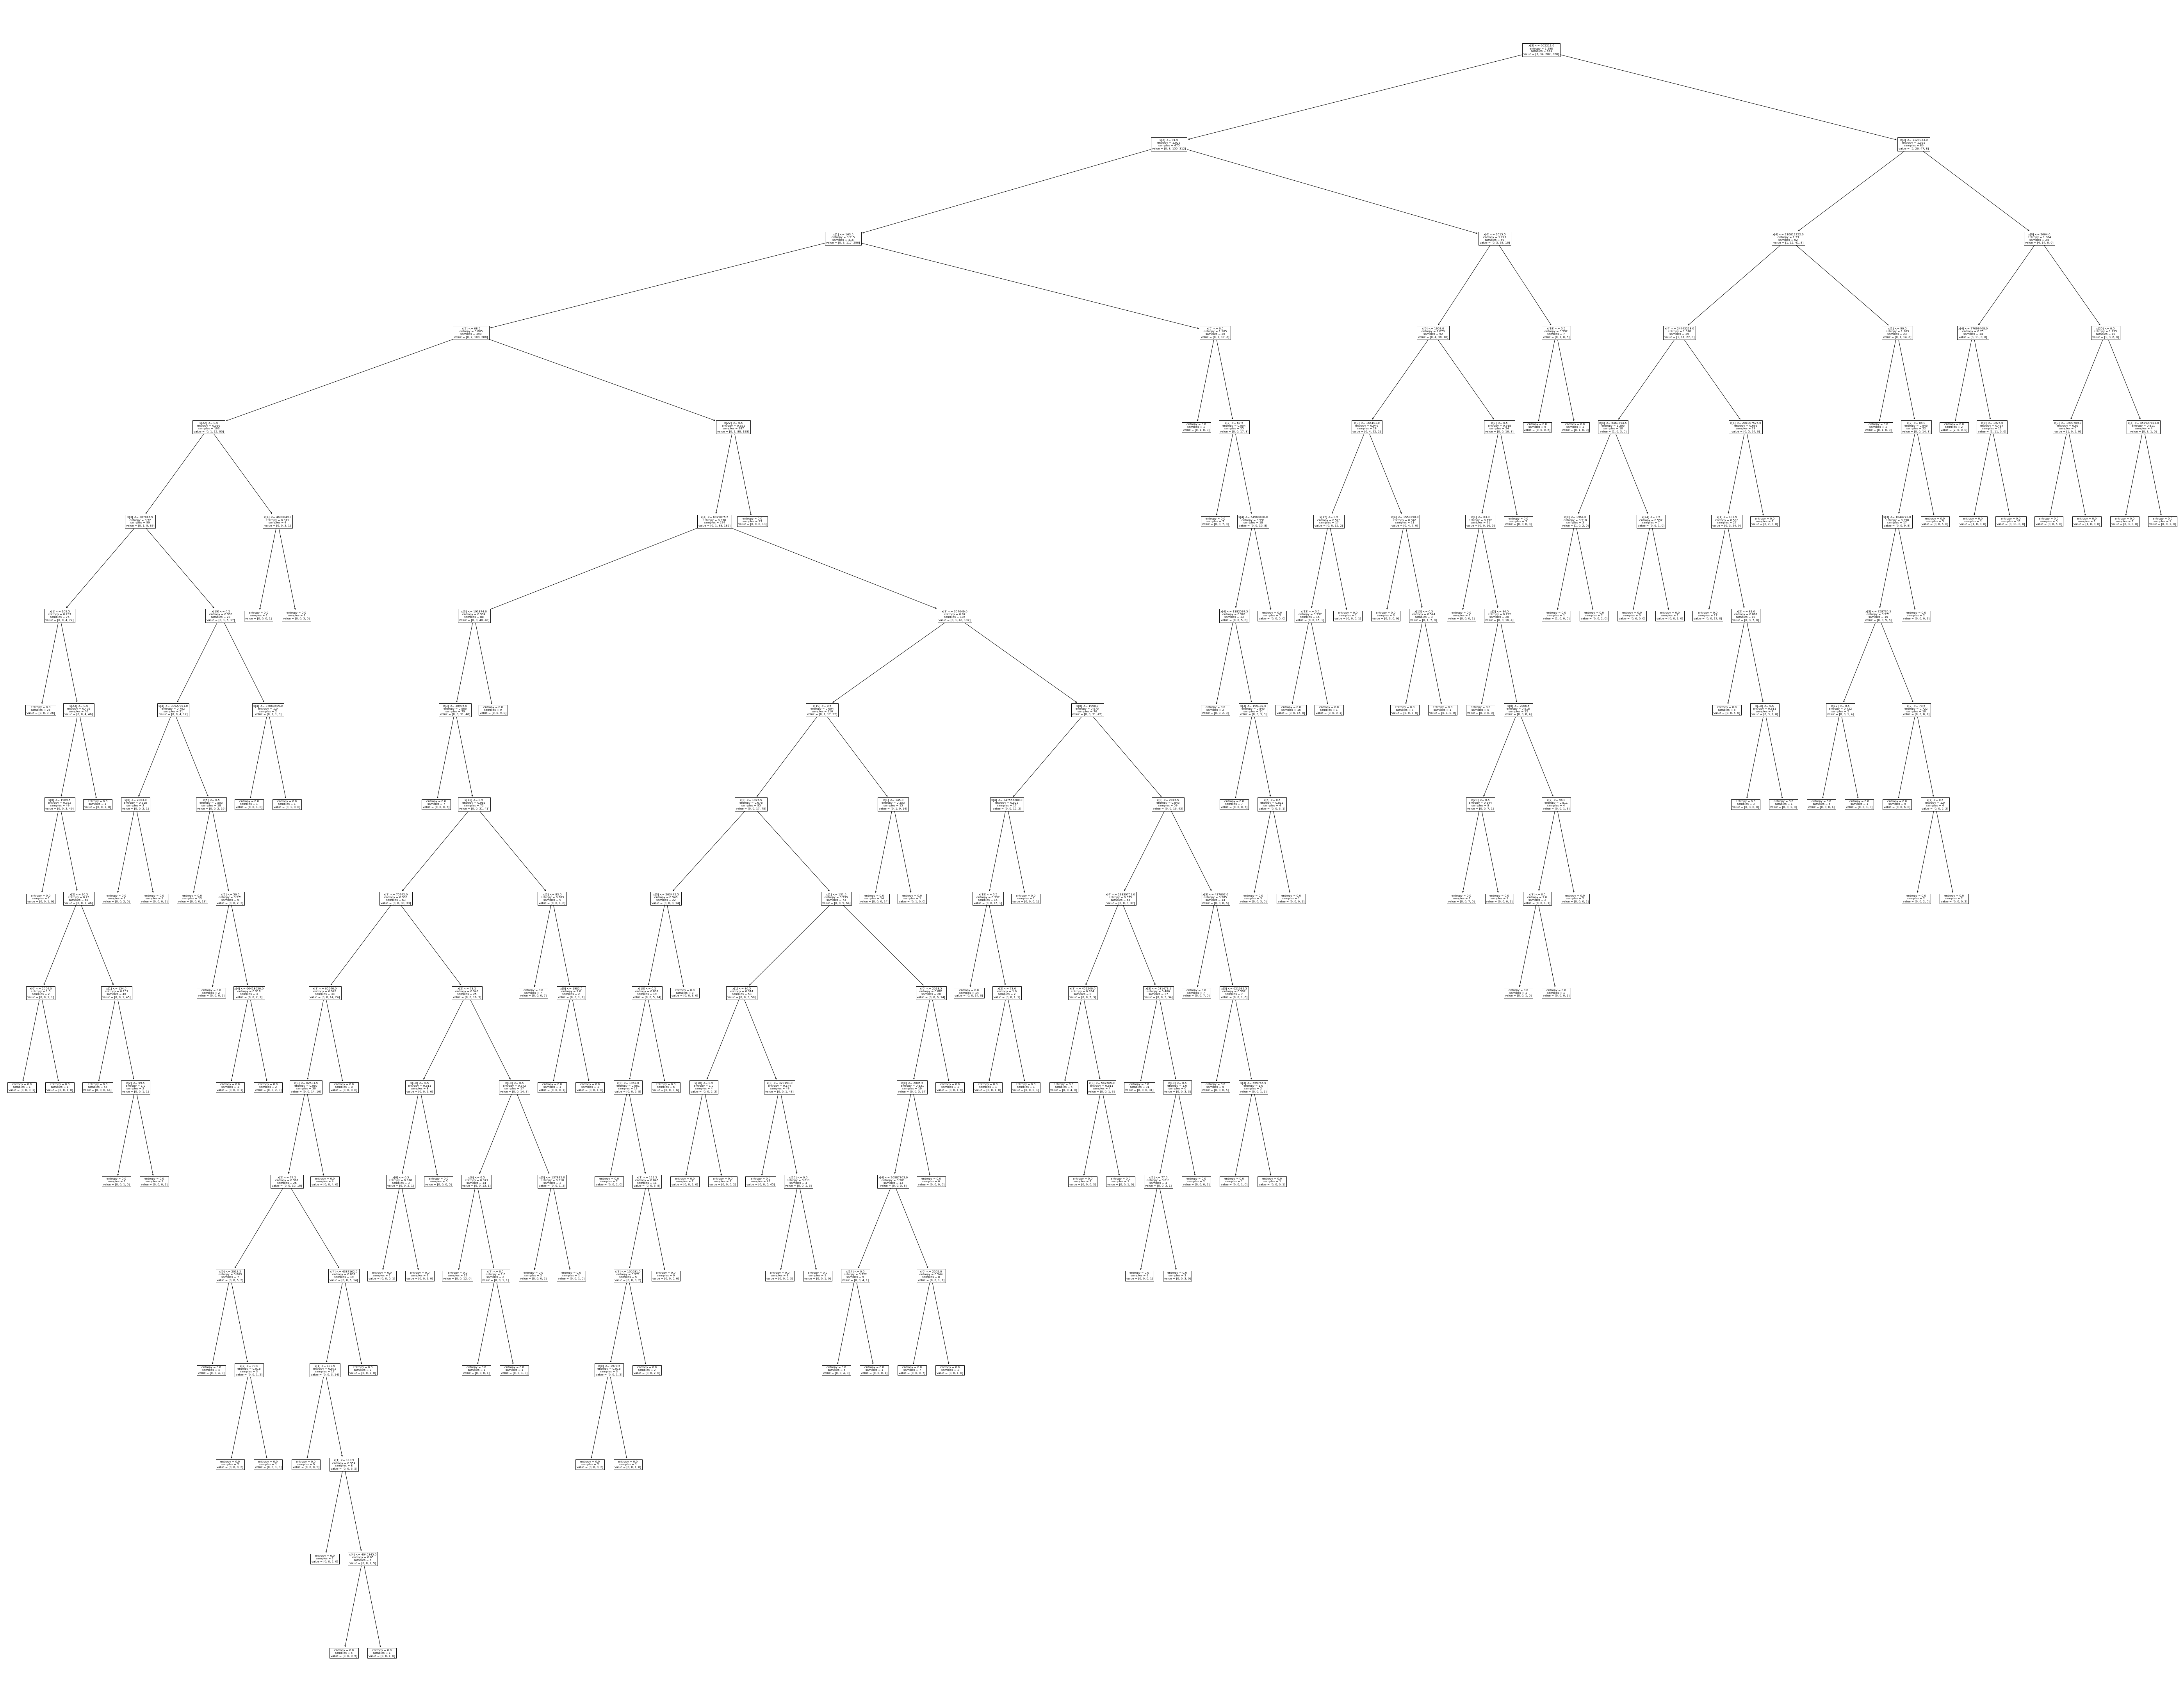

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(100,80))      # é possível dar zoom na imagem para vê-la com mais detalhes
fig = tree.plot_tree(dtree)

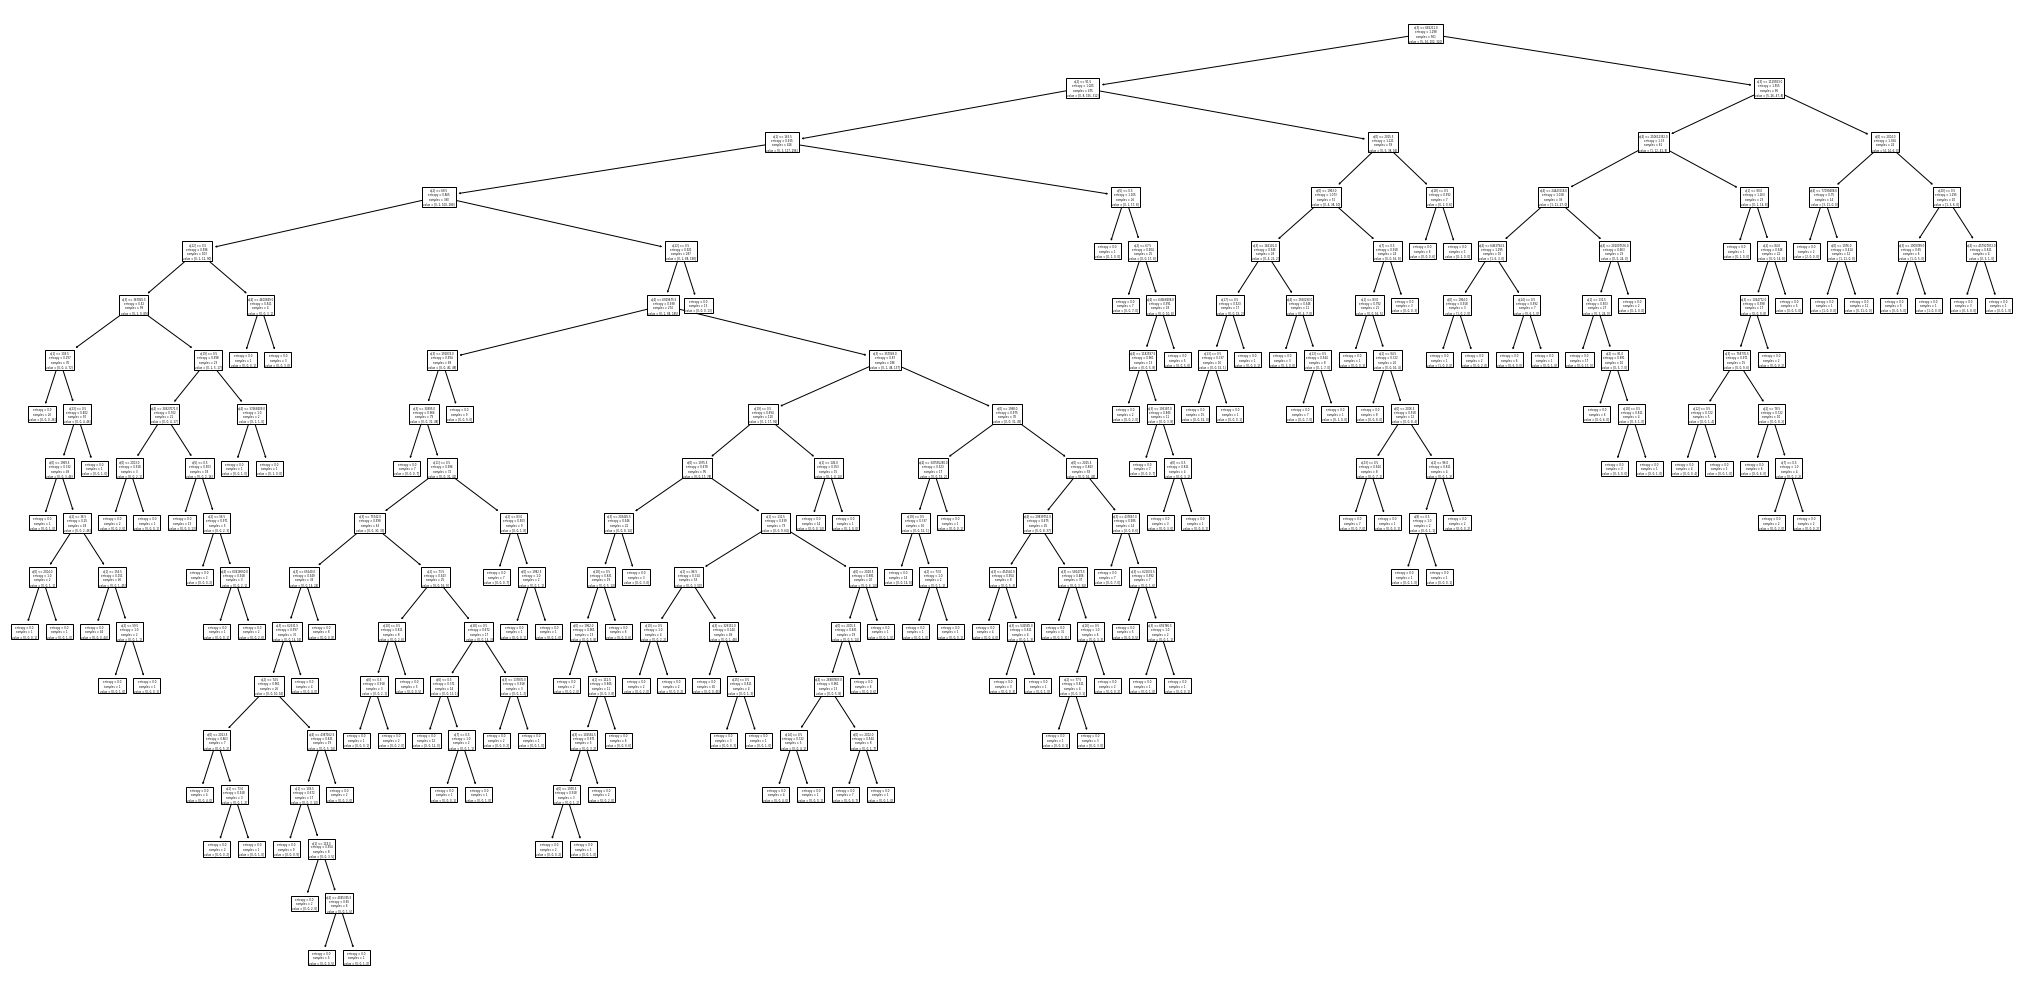

In [ ]:
fig = plt.figure(figsize=(36,18))
fig = tree.plot_tree(dtree)

## Fazendo a classificação dos dados de teste

In [ ]:
predictions = dtree.predict(X_test)

# Medidas de Desempenho

## Importando bibliotecas necessárias

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

## Gerando a matriz de confusão

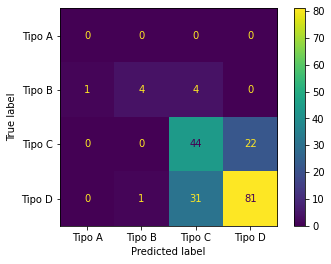

In [ ]:
cm = confusion_matrix(y_test.values, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tipos)

disp.plot()

### Obtendo os valores de Verdadeiro Positivo (VP), Verdadeiro Negativo (VN), Falso Positivo (FP), Falso Negativo (FN)

In [ ]:
VP = np.zeros(4)
VN = np.zeros(4)
FP = np.zeros(4)
FN = np.zeros(4)

# Tipo_A:
VP[0] = cm[0][0]
FP[0] = cm[1][0] + cm[2][0] + cm[3][0]
FN[0] = cm[0][1] + cm[0][2] + cm[0][3]
VN[0] = cm[1][1] + cm[2][2] + cm[3][3]

# Tipo_B:
VP[1] = cm[1][1]
FP[1] = cm[0][1] + cm[2][1] + cm[3][1]
FN[1] = cm[1][0] + cm[1][2] + cm[1][3]
VN[1] = cm[0][0] + cm[2][2] + cm[3][3]

# Tipo_C:
VP[2] = cm[2][2]
FP[2] = cm[0][2] + cm[1][2] + cm[3][2]
FN[2] = cm[2][0] + cm[2][1] + cm[2][3]
VN[2] = cm[0][0] + cm[1][1] + cm[3][3]

# Tipo_D:
VP[3] = cm[3][3]
FP[3] = cm[0][3] + cm[1][3] + cm[2][3]
FN[3] = cm[3][0] + cm[3][1] + cm[3][2]
VN[3] = cm[0][0] + cm[1][1] + cm[2][2]

## Calculando acurácia, precisão, revocação e medida-F

In [ ]:
acuracia = np.zeros(4)
precisao = np.zeros(4)
revocacao = np.zeros(4)
f1 = np.zeros(4)


for i in range(4):
  print("Dados de", tipos[i], ":\n")

  acuracia[i] = (VP[i] + VN[i])/(VP[i] + VN[i] + FN[i] + FP[i]) * 100
  precisao[i] = VP[i]/(VP[i] + FP[i]) * 100 if (VP[i] + FP[i]) != 0 else 0
  revocacao[i] = VP[i]/(VP[i] + FN[i]) * 100 if (VP[i] + FN[i]) != 0 else 0
  f1[i] = (2 * precisao[i] * revocacao[i] / (precisao[i] + revocacao[i])) if (precisao[i] + revocacao[i]) != 0 else 0

  print("Acurácia =", "%.2f" % acuracia[i], "%")
  print("Precisão =", "%.2f" % precisao[i], "%")
  print("Revocação =", "%.2f" % revocacao[i], "%")
  print("F1-Score =", "%.2f" % f1[i], "%")
  print("\n")

Dados de Tipo A :

Acurácia = 99.23 %
Precisão = 0.00 %
Revocação = 0.00 %
F1-Score = 0.00 %


Dados de Tipo B :

Acurácia = 95.56 %
Precisão = 80.00 %
Revocação = 44.44 %
F1-Score = 57.14 %


Dados de Tipo C :

Acurácia = 69.35 %
Precisão = 55.70 %
Revocação = 66.67 %
F1-Score = 60.69 %


Dados de Tipo D :

Acurácia = 70.49 %
Precisão = 78.64 %
Revocação = 71.68 %
F1-Score = 75.00 %




## Obtendo medidas de desempenho médias

In [ ]:
import statistics as s

print("Acurácia =", "%.2f" % s.mean(acuracia), "%")
print("Precisão =", "%.2f" % s.mean(precisao), "%")
print("Revocação =", "%.2f" % s.mean(revocacao), "%")
print("F1-Score =", "%.2f" % s.mean(f1), "%")
print("\n")

Acurácia = 83.66 %
Precisão = 53.58 %
Revocação = 45.70 %
F1-Score = 48.21 %


